In [1]:
import sys
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from basis_expansions.basis_expansions import (
    Polynomial, LinearSpline)

from regression_tools.dftransformers import (
    ColumnSelector, Identity, FeatureUnion, MapFeature, Intercept)

from regression_tools.plotting_tools import (
    plot_univariate_smooth,
    bootstrap_train,
    display_coef,
    plot_bootstrap_coefs,
    plot_partial_depenence,
    plot_partial_dependences,
    predicteds_vs_actuals)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings

https://github.com/GalvanizeDataScience/predictive-linear-regression

In [2]:
df = pd.read_csv('/home/asus/G_school_lectures/Week_5_Lectures/predictive-linear-regression/data/balance.csv')

In [3]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Text(0.5, 1.0, 'Age Vs Income')

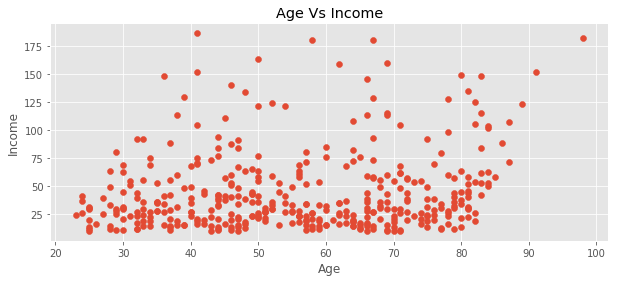

In [4]:
fig, ax = plt.subplots(1, figsize=(10,4))
ax.scatter(df['Age'],df['Income'])
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_title('Age Vs Income')

In [5]:
df.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

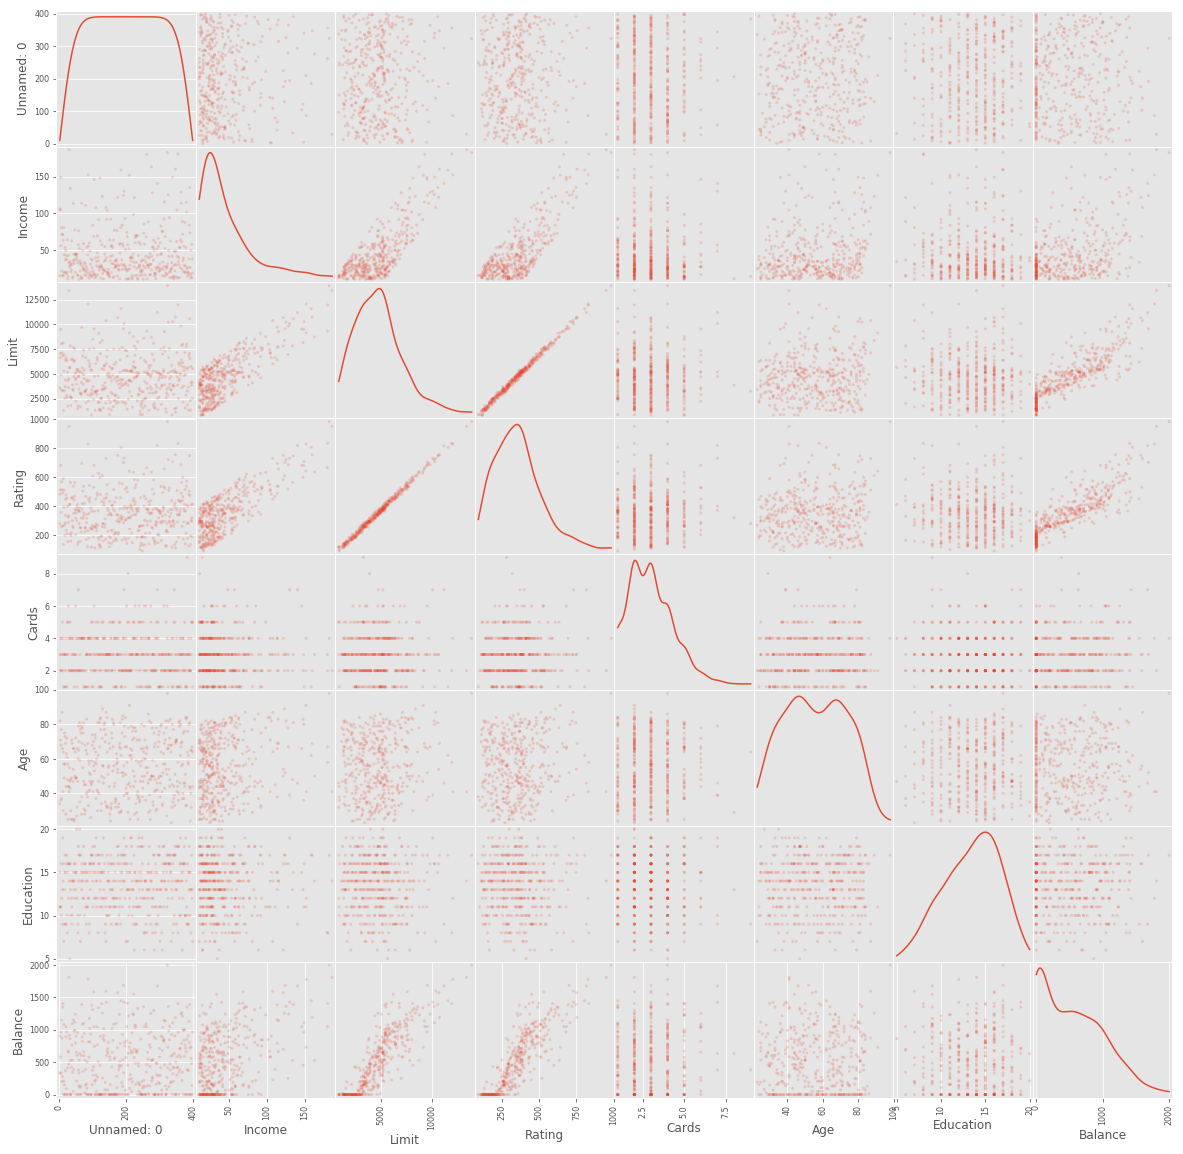

In [6]:
_ = scatter_matrix(df, alpha=0.2, figsize=(20,20), diagonal='kde')


## Exploratory Data Analysis and Model Specification

4. Create some univariate plots of the numerical features, and overlay a spline on each to get a view for how the balance varies with respect to each of those features. Make notes of anything unusual.


In [7]:
df.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [8]:
numeric_predictors = [
    "Income", "Limit", "Rating", "Cards", "Age", "Education"]

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

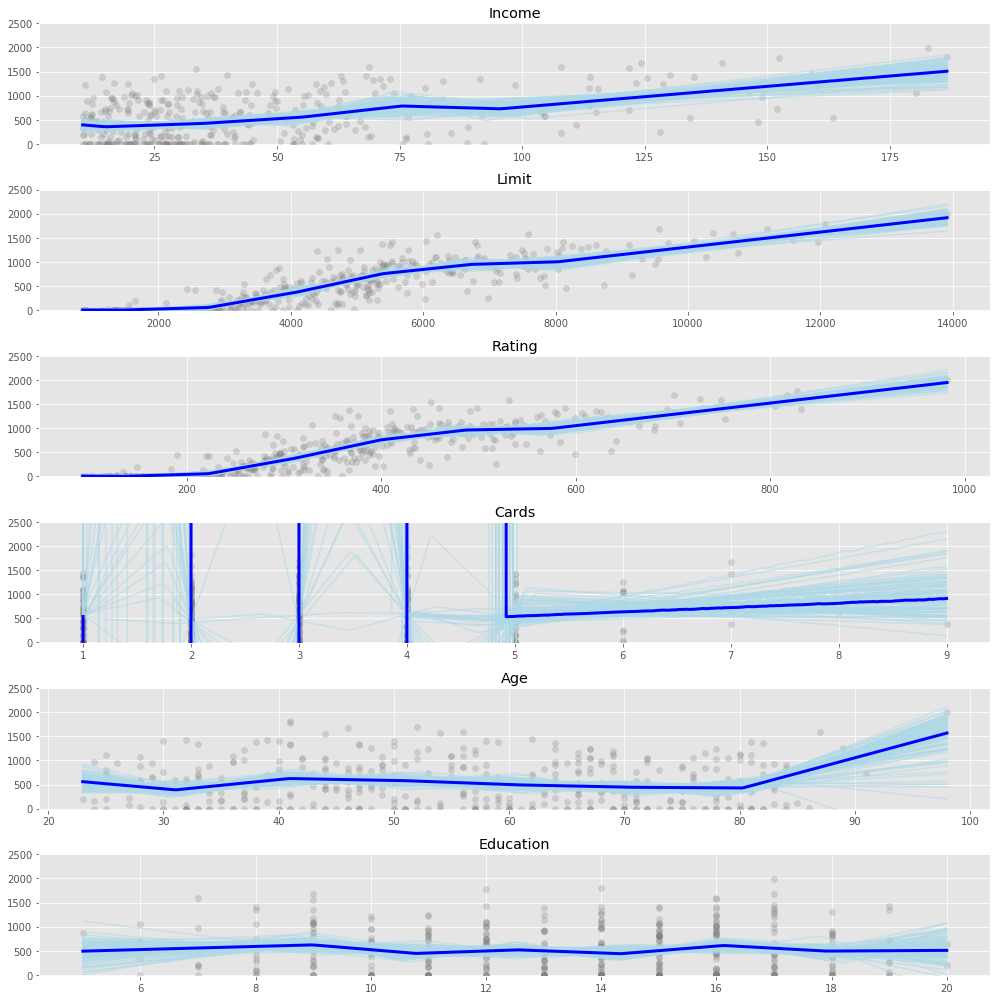

In [9]:
fig, axs = plt.subplots(len(numeric_predictors), figsize=(14, 14))

for name, ax in zip(numeric_predictors, axs.flatten()):
    plot_univariate_smooth(ax, 
                           df[name].values.reshape(-1, 1),
                           df['Balance'],
                           bootstrap=100)
    ax.set_title(name)
    ax.set_ylim(-20, 2500)
fig.tight_layout()

Text(0.5, 1.0, 'Cards')

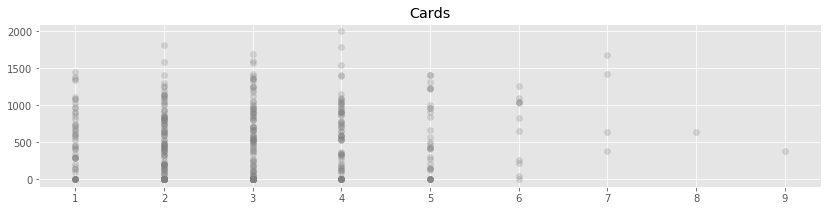

In [10]:
# Better plot of the discrete card variable

fig, ax = plt.subplots(figsize=(14,3))

plot_univariate_smooth(ax,
                      df['Cards'].values.reshape(-1,1),
                      df['Balance'],
                      smooth=False)
ax.set_title("Cards")



In [11]:
df_non_zero = df[df['Balance'] > 0]

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

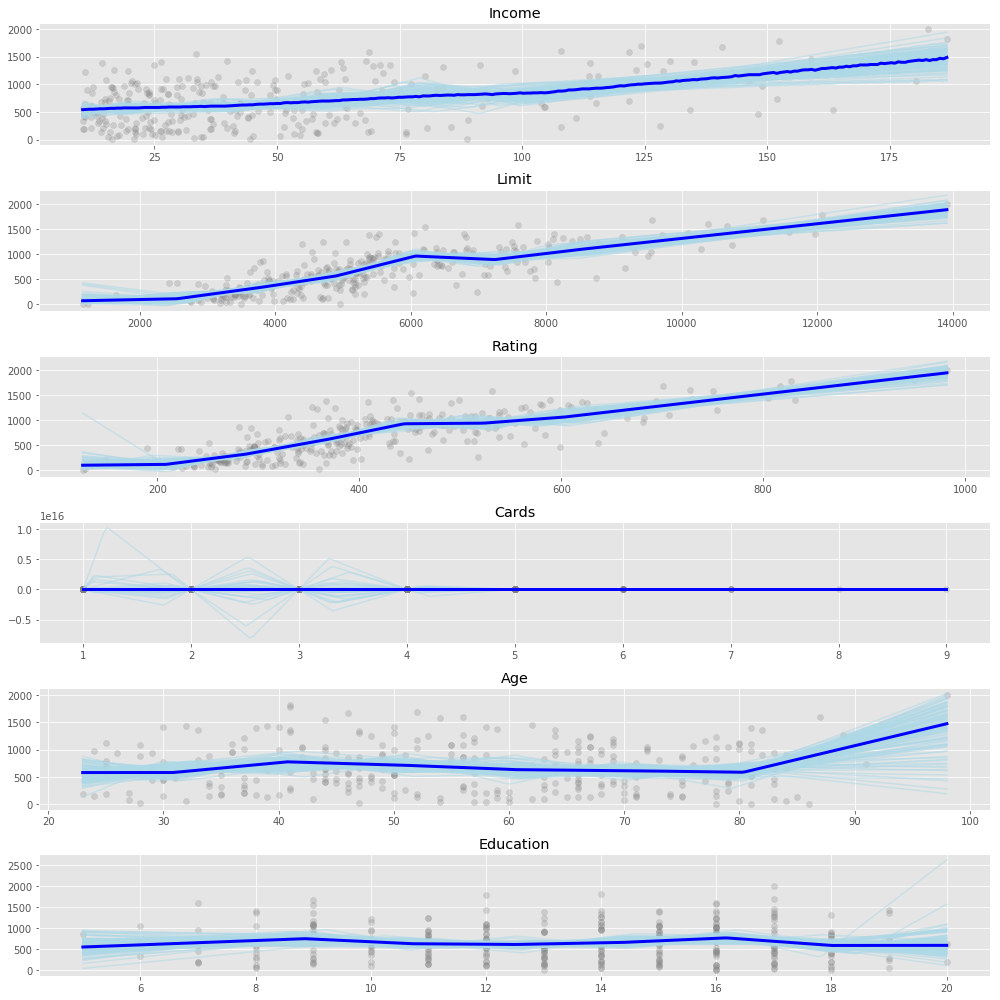

In [12]:
fig, axs = plt.subplots(len(numeric_predictors), figsize=(14,14))

for name, ax in zip(numeric_predictors, axs.flatten()):
    plot_univariate_smooth(ax, 
                          df_non_zero[name].values.reshape(-1,1),
                          df_non_zero['Balance'],
                          bootstrap=100)
    ax.set_title(name)
fig.tight_layout()

In [13]:
df_non_zero.loc[:, "LogBalance"] = np.log(df_non_zero.loc[:, "Balance"])

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/utils/validati

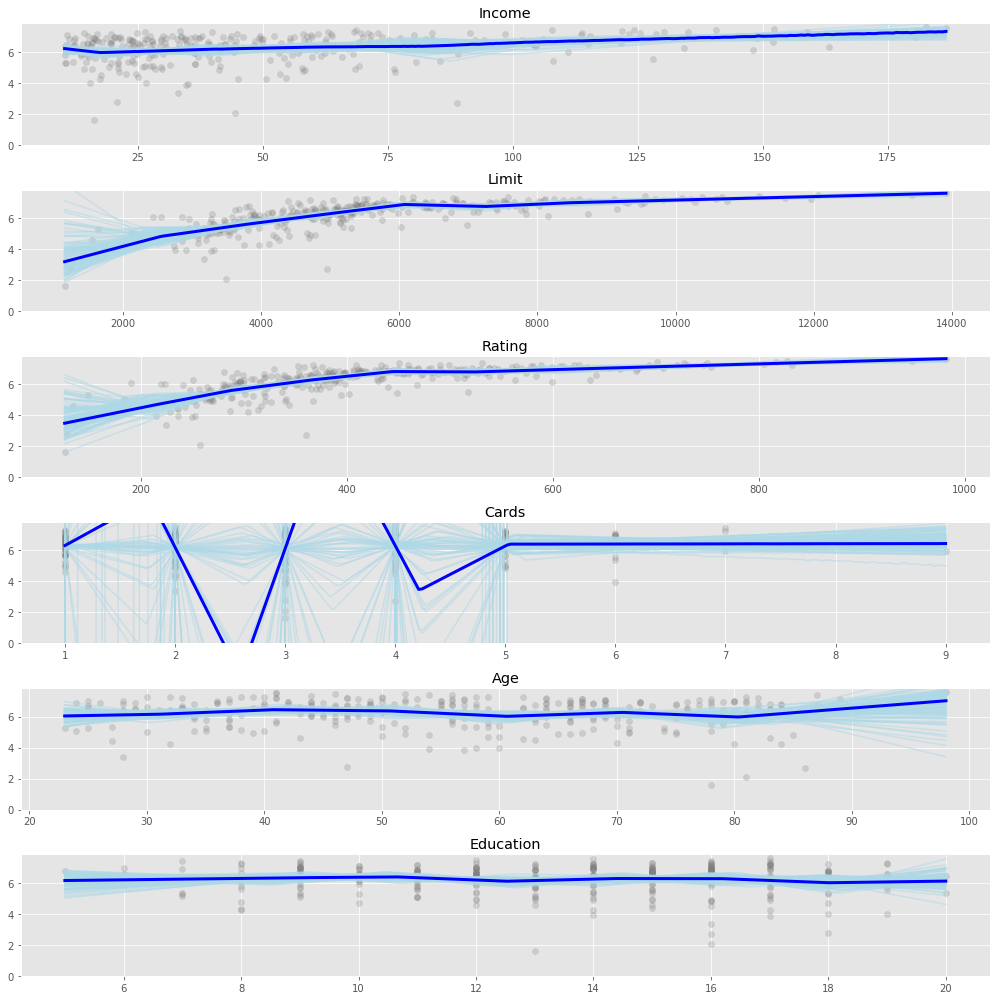

In [14]:
fig, axs = plt.subplots(len(numeric_predictors), figsize=(14, 14))

for name, ax in zip(numeric_predictors, axs.flatten()):
    plot_univariate_smooth(ax, 
                           df_non_zero[name].values.reshape(-1, 1),
                           df_non_zero['LogBalance'],
                           bootstrap=100)
    ax.set_title(name)
    ax.set_ylim((0, np.log(2500)))
fig.tight_layout()



These scatterplots certainly look more evenly spaced around the fit splines, a point of evidence in favor of fitting the linear regression to predict the balance given that it is non-zero.




8. Using the information in the univariate plots, create feature transformation pipelines for each of the continuous predictors.


In [15]:
income_spec = Pipeline([
    ('Income_select', ColumnSelector(name='Income')),
    ('Income_spline', LinearSpline(knots = [25,50,75,100,125]))
])

In [16]:
def simple_spline_specification(name, knots):
    select_name = '{}_select'.format(name)
    spline_name = '{}_spline'.format(name)
    return Pipeline([
        (select_name, ColumnSelector(name=name)),
        (spline_name, LinearSpline(knots=knots))
    ])

In [17]:
limit_spec = simple_spline_specification("Limit", [3000, 4000, 5000, 6000, 7000, 8000])
rating_spec = simple_spline_specification("Rating", [200, 300, 400, 500, 600])
cards_spec = simple_spline_specification("Cards", [1.5, 3.5, 5.5])
age_spec = simple_spline_specification("Age", [30, 40, 50, 60, 70])
education_spec = simple_spline_specification("Education", [8, 10, 12, 14, 16])

In [18]:
def unique_levels(df, name):
    return df[name].unique()

In [19]:
print("Gender unique levels: ", unique_levels(df_non_zero, "Gender"))
print("Student unique levels: ", unique_levels(df_non_zero, "Student"))
print("Married unique levels: ", unique_levels(df_non_zero, "Married"))

Gender unique levels:  [' Male' 'Female']
Student unique levels:  ['No' 'Yes']
Married unique levels:  ['Yes' 'No']


In [ ]:
fdf

### EDA: Categorical Predictors


In [20]:
df2 = df

In [21]:
df2.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [22]:
df2['Gender'] = df['Gender'].apply(lambda x : x.strip())

In [23]:
df2['Student'] = df['Student'].apply(lambda x : x.strip())

In [24]:
df2['Ethnicity'] = df['Ethnicity'].apply(lambda x : x.strip())

In [25]:
df2['Married'] = df['Married'].apply(lambda x : x.strip())